### Understanding Concurrency in Python
Concurrency refers to the execution of multiple tasks simultaneously in a program. There are primarily three ways to introduce concurrency in Python - Multithreading, Multiprocessing and Asyncio. Each approach has its own advantages and disadvantages.

Choosing the right concurrency model for your Python program depends on the specific requirements and use-cases. This comprehensive guide will provide an overview of all three approaches with code examples to help you decide when to use Multithreading, Multiprocessing or Asyncio in Python.

## Multithreading in Python
**Multithreading** refers to concurrently executing multiple threads within a single process. 
The Python thread module allows you to spawn multiple threads in your program.
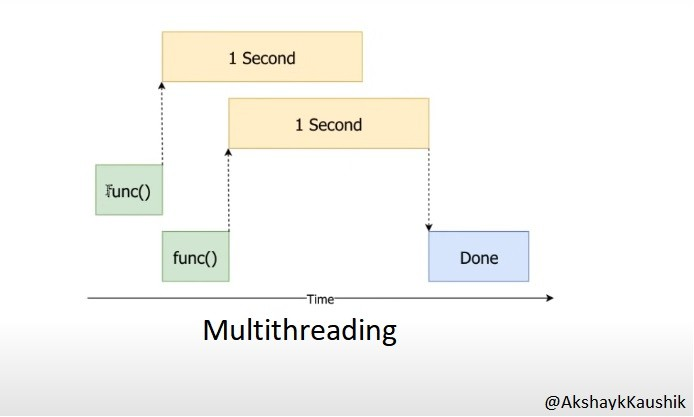

In [1]:
import threading


def print_cube(num):
    """
    Function to print cube of given num
    """
    print("Cube: {}".format(num * num * num))


def print_square(num):
    """
    Function to print square of given num
    """
    print("Square: {}".format(num * num))


if __name__ == "__main__":
    # creating thread
    t1 = threading.Thread(target=print_square, args=(10,))
    t2 = threading.Thread(target=print_cube, args=(10,))

    # starting thread 1
    t1.start()
    # starting thread 2
    t2.start()

    # wait until thread 1 is completely executed
    t1.join()
    # wait until thread 2 is completely executed
    t2.join()

    print("Done!")

Square: 100
Cube: 1000
Done!


In the above code, we create two threads t1 and t2. t1 calls print_square() function while t2 calls print_cube().

We start both the threads using start() method. join() ensures that the main thread waits for these threads to complete before terminating.

The key advantage of multithreading is that it allows maximum utilization of a single CPU core by executing threads concurrently. All threads share same process resources like memory. Context switching between threads is lightweight.

However, multithreading also comes with challenges like race conditions, deadlocks etc. when multiple threads try to access shared resources. Careful synchronization is needed to avoid these issues.

# Multiprocessing in Python
**Multiprocessing** refers to executing multiple processes concurrently. 
The multiprocessing module in Python allows spawning processes using an API similar to threading.
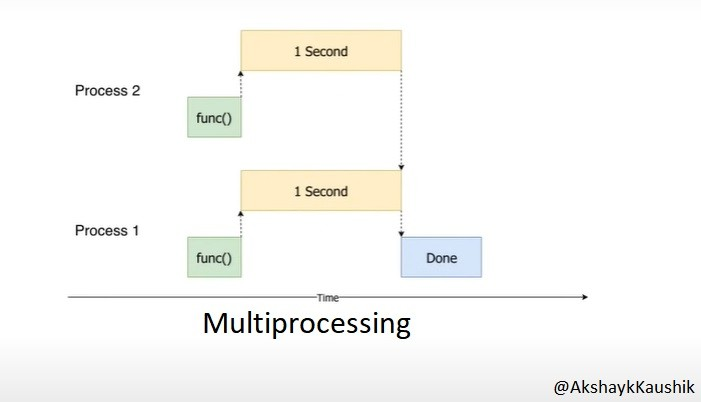

In [ ]:
import multiprocessing


def print_cube(num):
    """
    Function to print cube of given num
    """
    print("Cube: {}\n".format(num * num * num))


def print_square(num):
    """
    Function to print square of given num
    """
    print("Square: {}".format(num * num))


def print_triangle(num):
    """
    Function to print square of given num
    """
    print("Triangle: {}".format(num * num * num))


if __name__ == "__main__":
    # creating process
    p1 = multiprocessing.Process(target=print_square, args=(10,))
    p2 = multiprocessing.Process(target=print_cube, args=(10,))
    p3 = multiprocessing.Process(target=print_triangle, args=(10,))

    # starting process 1
    p1.start()
    # starting process 2
    p2.start()
    # starting process 3
    p3.start()

    # wait until process 1 is finished
    p1.join()
    # wait until process 2 is finished
    p2.join()
    # wait until process 3 is finished
    p3.join()

    print("Done!")

Square: 100
Cube: 1000
Triangle: 1000

Done!


In the above code, we create two threads **t1** and **t2**. **t1** calls print_square() function while **t2** calls print_cube().

We start both the threads using **start()** method. **join()** ensures that the main thread waits for these threads to complete before terminating.

The key advantage of multithreading is that it allows maximum utilization of a single CPU core by executing threads concurrently. All threads share same process resources like memory. Context switching between threads is lightweight.

However, multithreading also comes with challenges like race conditions, deadlocks etc. when multiple threads try to access shared resources. Careful synchronization is needed to avoid these issues.

# Asyncio in Python
Asyncio provides a single-threaded, non-blocking concurrency model in Python. It uses cooperative multitasking and an event loop to execute coroutines concurrently.

Here is a simple asyncio example:

In [ ]:
import asyncio


async def print_square(num):
    print("Square: {}".format(num * num))


async def print_cube(num):
    print("Cube: {}".format(num * num * num))


async def main():
    # Schedule coroutines to run concurrently
    await asyncio.gather(print_square(10), print_cube(10))


asyncio.run(main())